In [21]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
data = pd.read_json('../JSON/new_mvp.json')

In [23]:
pos_mapping = {
    'PG': 1,
    'SG': 2,
    'SF': 3,
    'PF': 4,
    'C': 5
}

data['Pos'] = data['Pos'].map(pos_mapping)

In [25]:
training = data[data['Share'] != 0]

In [26]:
training.describe()

,Season,Pos,Age,G,MP,FG,FGA,FG%,3P,3PA,...,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,VORP,Win_PCT,Share
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,2010.187500,2.841667,27.241667,74.645833,2706.225000,617.012500,1283.575000,0.483592,92.350000,253.766667,...,0.391029,4.906667,17.645417,11.395833,25.742917,1.908333,1.866250,5.002083,52.412500,0.188250
std,5.333467,1.452142,3.728205,7.364081,370.940577,134.547327,295.643151,0.042180,80.243004,203.312248,...,0.119189,3.084412,6.934860,4.792374,12.265523,0.697585,1.658851,2.161579,8.002657,0.283077
min,2000.000000,1.000000,19.000000,49.000000,1625.000000,210.000000,437.000000,0.395000,0.000000,0.000000,...,0.172000,1.000000,7.000000,4.400000,4.800000,0.400000,0.100000,0.700000,26.000000,0.001000
25%,2006.000000,1.000000,24.000000,71.000000,2489.000000,534.750000,1066.500000,0.456000,13.750000,56.000000,...,0.315000,2.475000,11.400000,7.375000,15.975000,1.400000,0.600000,3.375000,47.000000,0.003000
50%,2010.000000,3.000000,27.000000,77.000000,2778.000000,632.500000,1321.500000,0.480000,86.000000,263.000000,...,0.380000,3.800000,17.050000,10.250000,24.400000,1.800000,1.350000,4.800000,53.000000,0.030500
75%,2014.000000,4.000000,29.250000,80.000000,2981.250000,712.500000,1481.250000,0.505000,132.000000,363.500000,...,0.442250,7.300000,23.300000,15.325000,33.925000,2.400000,2.600000,6.025000,58.000000,0.294000
max,2019.000000,5.000000,38.000000,82.000000,3485.000000,978.000000,2173.000000,0.669000,402.000000,1028.000000,...,0.978000,13.800000,34.900000,23.200000,57.300000,3.900000,7.800000,12.400000,73.000000,1.000000


### MVP Share分布圖

Text(0.5, 0, 'Award share')

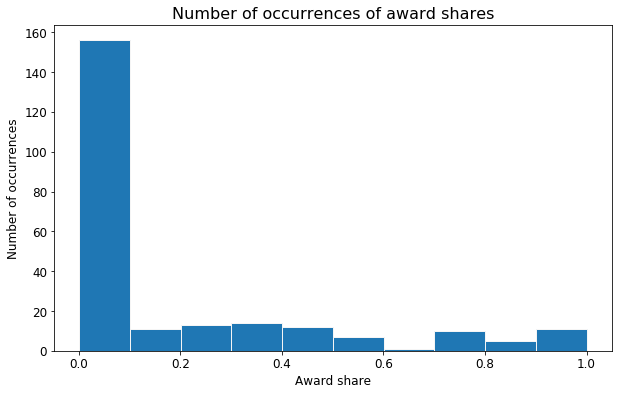

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(training.Share, bins=10, edgecolor='#F5F5F5')
plt.title("Number of occurrences of award shares", size=16)
plt.ylabel("Number of occurrences", size=12)
plt.xlabel("Award share", size=12)

### 特徵關係圖

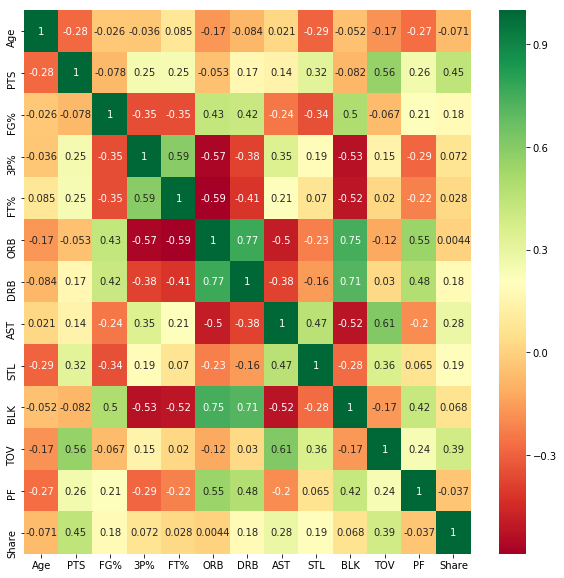

In [476]:
# 設定顯示特徵
cols = list(feature)
cols.append('Share')
# 視覺化特徵關係
fig = plt.figure(figsize=(10, 10))
fig.set_facecolor('white')
plt.rcParams.update({'font.size': 10})
sns.heatmap(training[cols].corr(), annot=True, cmap="RdYlGn")

### 特徵重要度

In [29]:
from sklearn.ensemble import RandomForestRegressor

feat_X = training.drop(['Player', 'Season', 'Tm', 'Share'], axis=1)
feat_y = training['Share']
model = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True)
model.fit(feat_X, feat_y)

C:\Users\ying\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=True, random_state=42, verbose=0, warm_start=False)

In [30]:
feat_labels = feat_X.columns
# print(feat_labels)
importances = model.feature_importances_
# print(importances)
indices = np.argsort(importances)[::-1]
# print(indices)
for feat in range(feat_X.shape[1]):
    print("%d) %-*s %f" % (feat + 1, 30, feat_labels[indices[feat]], importances[indices[feat]]))

1) VORP                           0.370330
2) PER                            0.198373
3) Win_PCT                        0.046386
4) TOV                            0.034823
5) 3P%                            0.034115
6) FGA                            0.033985
7) FG                             0.032292
8) Age                            0.028877
9) AST                            0.019948
10) AST%                           0.018497
11) eFG%                           0.014573
12) FTr                            0.013437
13) FT%                            0.012994
14) G                              0.012212
15) TS%                            0.012107
16) STL                            0.010971
17) 2P%                            0.010114
18) MP                             0.009971
19) 2PA                            0.008407
20) PTS                            0.007822
21) DRB%                           0.006846
22) BLK                            0.006667
23) FG%                            0.0064

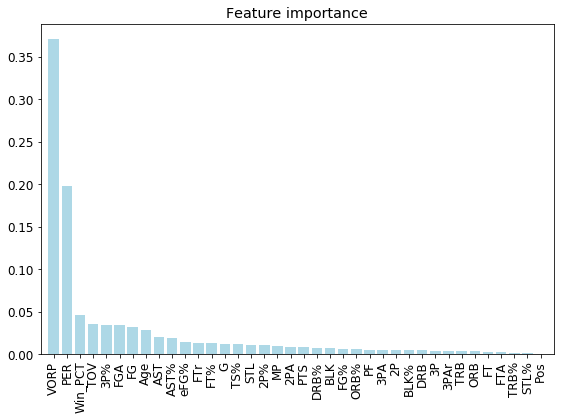

In [31]:
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 12})
plt.title('Feature importance')
plt.bar(range(feat_X.shape[1]), importances[indices], color='lightblue', align='center')
plt.xticks(range(feat_X.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, feat_X.shape[1]])
plt.tight_layout()
plt.show()

# <font color=" #FF0000">選擇特徵

In [32]:
training.columns

Index(['Player', 'Season', 'Pos', 'Age', 'Tm', 'G', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PER',
       'TS%', '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%',
       'VORP', 'Win_PCT', 'Share'],
      dtype='object')

In [477]:
# feature = ['PTS', 'Win_PCT', 'FG', 'TOV', 'AST', 'DRB', 'FTA', 'eFG%']
feature = ['PTS', 'Win_PCT', 'AST', 'DRB', 'VORP', 'PER', 'TOV']    #.602
# feature = ['PTS', 'Win_PCT', 'AST', 'DRB', 'VORP', 'TOV', '3P%']
# feature = ['Age', 'PTS', 'FG%', '3P%', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
print(feature)

['PTS', 'Win_PCT', 'AST', 'DRB', 'VORP', 'PER', 'TOV']


### 拆分訓練及驗證資料

In [478]:
X = training[feature]
y = training['Share']

In [479]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)
X_sqrt_train, X_sqrt_valid, y_sqrt_train, y_sqrt_valid = train_test_split(X, np.sqrt(y), test_size=0.3, random_state=42)

## K-fold

In [480]:
from sklearn.model_selection import GroupShuffleSplit
cols = list(feature)
cols.append('Season')

def K_fold(model):
    temp_X = training[cols]
    temp_y = training[['Share', 'Season']]
    scores = []

    for year in range(2010, 2020):
        X_train_data, y_train_data = temp_X[temp_X['Season'] != year].drop('Season',axis=1).to_numpy(), temp_y[temp_y['Season'] != year].drop('Season',axis=1).to_numpy()
        X_valid_data, y_valid_data = temp_X[temp_X['Season'] == year].drop('Season',axis=1).to_numpy(), temp_y[temp_y['Season'] == year].drop('Season',axis=1).to_numpy()
        model.fit(X_train_data, y_train_data)
        score = model.score(X_valid_data, y_valid_data)
        scores.append(score)
        print('Fold year: %d, Score: %.5f' % (year, score))
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

### 計算準確率

In [481]:
# Create function that gives accuracy scores for each model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def scores(y, model):
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)

    print("預測訓練 R2 score: %.3f" % r2_score(y_train, model.predict(X_train)))
    print("Mean squared error: %.3f" % mean_squared_error(y_valid, y_pred))
    print('R2 score: %.3f' % r2_score(y_valid, y_pred))

### 調整參數

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

In [18]:
# 透過視覺化尋找適合的參數
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
def find_param(name, param):
    train_scores, valid_scores = validation_curve(estimator=rf, X=X_train, y=y_train, param_name=name, param_range=param, cv=10)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    valid_mean = np.std(valid_scores, axis=1)
    valid_std = np.std(valid_scores, axis=1)
    plt.plot(param, train_mean, color='blue', marker='o', markersize=5, label='train accuracy')
    plt.fill_between(param, train_mean+train_std, train_mean-train_std, alpha=0.15, color='blue')
    plt.plot(param, valid_mean, color='red', marker='s', linestyle='--', markersize=5, label='valid accuracy')
    plt.fill_between(param, valid_mean+valid_std, valid_mean-valid_std, alpha=0.15, color='red')
    plt.grid()
    plt.xscale('log')
    plt.legend(loc='lower right')
    plt.xlabel(name)
    plt.ylabel('Accuracy')
    plt.ylim([0.0, 1.0])
    plt.show()

In [ ]:
# [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)]
param = [10, 100, 300, 500, 1000, 5000, 10000, 11500, 15000]
find_param('n_estimators', param)

In [ ]:
# random_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

In [242]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [15000, 10000, 5000, 3000, 300]
}

In [243]:
# Create a based model
try_rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, max_depth=60, min_samples_split=8, max_leaf_nodes=14)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = try_rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2, scoring='r2')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   49.0s finished


{'n_estimators': 300}

## Random Forest Regressor

In [497]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, max_depth=9, n_estimators=3500, min_samples_split=3, min_samples_leaf=6, bootstrap=True, max_leaf_nodes=16)
# rf = RandomForestRegressor(random_state=42, n_jobs=-1, oob_score=True, max_depth=9, n_estimators=24, min_samples_split=2, min_samples_leaf=3, bootstrap=True, max_leaf_nodes=19)

In [498]:
y_rf = []
scores(y_rf, rf)

預測訓練 R2 score: 0.709
Mean squared error: 0.036
R2 score: 0.602


In [488]:
K_fold(rf)

C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2010, Score: 0.73585


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2011, Score: 0.28180


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2012, Score: 0.24568


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2013, Score: 0.72813


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2014, Score: 0.79411


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2015, Score: 0.56034


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2016, Score: 0.59809


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2017, Score: 0.54181


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2018, Score: 0.75992


C:\Users\ying\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


Fold year: 2019, Score: 0.84233
CV accuracy: 0.609 +/- 0.197


### 執行預測

In [489]:
data.sort_values(by=['Season', 'Share'], ascending=[True, False], inplace=True)

In [490]:
pred = data[data['Season'] == 2019]

In [491]:
t = data[(data['Season'] != 2019) & (data['Share'] != 0)]

In [492]:
t_X = t[feature]
t_y = t['Share']

In [493]:
rf.fit(t_X, t_y)
result = rf.predict(pred[feature])

In [494]:
names = list(pred.Player)
shares = list(pred.Share)
indices = np.argsort(result)[::-1]
rank = []
for player in range(0, 15):
    print("%d) %-*s %.3f %s %.3f" % (player + 1, 30, names[indices[player]], result[indices[player]], names[player], shares[player]))
    pred = {
        'name': names[indices[player]],
        'share': result[indices[player]]
    }
    act = {
        'name': names[player],
        'share': shares[player]
    }
    rank.append(temp)

1) James Harden                   0.788 Giannis Antetokounmpo 0.932
2) Giannis Antetokounmpo          0.746 James Harden 0.768
3) Trevon Duval                   0.452 Paul George 0.352
4) Zhou Qi                        0.392 Nikola Jokić 0.210
5) Nikola Jokić                   0.334 Stephen Curry 0.173
6) Anthony Davis                  0.326 Damian Lillard 0.068
7) Gary Payton                    0.275 Joel Embiid 0.049
8) Troy Caupain                   0.275 Kevin Durant 0.025
9) Alan Williams                  0.275 Kawhi Leonard 0.013
10) Jordan Sibert                  0.264 Russell Westbrook 0.008
11) Karl-Anthony Towns             0.260 Rudy Gobert 0.001
12) Joel Embiid                    0.132 LeBron James 0.001
13) Kevin Durant                   0.126 Álex Abrines 0.000
14) Nikola Vučević                 0.103 Quincy Acy 0.000
15) Paul George                    0.098 Jarrett Allen 0.000


In [ ]:
a = pd.DataFrame(rank)

In [ ]:
with open('../JSON/mvp.json', 'w') as file_object:
            json.dump(rank, file_object)

In [499]:
def output(rf, year, final):
    pred = data[data['Season'] == year]
    t = data[(data['Season'] != year) & (data['Share'] != 0)]
    t_X = t[feature]
    t_y = t['Share']
    rf.fit(t_X, t_y)
    result = rf.predict(pred[feature])
    names = list(pred.Player)
    shares = list(pred.Share)
    indices = np.argsort(result)[::-1]
    rank = []
    for player in range(0, 10):
        print("%d) %-*s %.3f %s %.3f" % (player + 1, 30, names[indices[player]], result[indices[player]], names[player], shares[player]))
        pred = {
            'pred_name': names[indices[player]],
            'pred_share': result[indices[player]],
            'act_name': names[player],
            'act_share': shares[player]
        }
        rank.append(pred)
    final[year] = rank

In [502]:
final = {}
for year in range(2016, 2020):
    output(rf, year, final)
temp = pd.DataFrame(final)
print(temp)

1) Stephen Curry                  0.858 Stephen Curry 1.000
2) Russell Westbrook              0.604 Kawhi Leonard 0.484
3) LeBron James                   0.551 LeBron James 0.482
4) Kevin Durant                   0.359 Russell Westbrook 0.371
5) James Harden                   0.312 Kevin Durant 0.112
6) Kawhi Leonard                  0.266 Chris Paul 0.082
7) Chris Paul                     0.174 Draymond Green 0.038
8) DeMarcus Cousins               0.161 Damian Lillard 0.020
9) Draymond Green                 0.155 James Harden 0.007
10) Rajon Rondo                    0.116 Kyle Lowry 0.005
1) Russell Westbrook              0.533 Russell Westbrook 0.879
2) James Harden                   0.519 James Harden 0.746
3) Kawhi Leonard                  0.413 Kawhi Leonard 0.495
4) Kevin Durant                   0.373 LeBron James 0.330
5) Stephen Curry                  0.324 Isaiah Thomas 0.080
6) LeBron James                   0.304 Stephen Curry 0.051
7) Isaiah Thomas                  0.229 

In [504]:
with open('../JSON/pred_mvp_result.json', 'w') as file_object:
            json.dump(final, file_object)